<a href="https://colab.research.google.com/github/rebcervasio/Machine_Learning_Data_Science/blob/main/Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Regression with Neural Networks in TensorFlow

Many definitions, but simple: predicting numerical variable based on some other sombination of variables, predicting a number

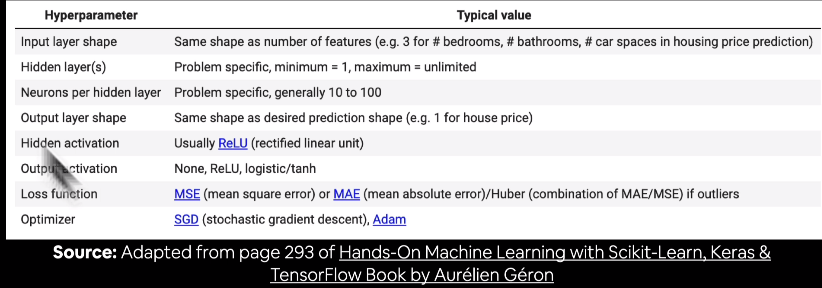

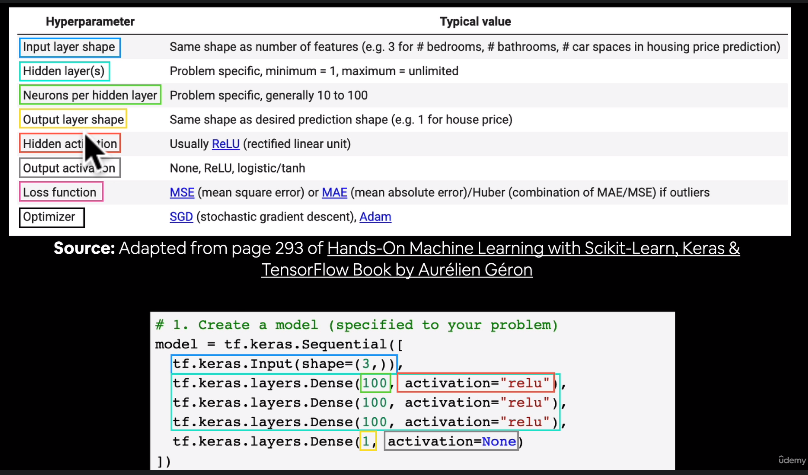

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


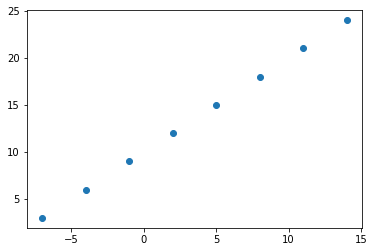

In [ ]:
# Create some data to view and fit

import numpy as np
import matplotlib.pyplot as plt

# Create features - independent variable
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (target) - dependent variable
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
print('hsouse info shape:', house_info.shape)
print('house price shape:', house_price.shape)

# here we have the example of house prices, the final output value is just one
# although we had more for the input

hsouse info shape: (3,)
house price shape: (1,)


In [ ]:
# Checking the shape of our X and y
input_shape = X.shape
output_shape = y.shape

print('input shape is:', input_shape)
print('output shape is:', output_shape)

# here we can see that we have many input values and also many output values,
# but in reality we just want to have one final predicted price

input shape is: (8,)
output shape is: (8,)


In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
# Atention! if we try to use just one value, meaning just one index, we get 
# no dimension, dimension zero! because it is a scalar
input_shape = X[0].shape
output_shape = y[0].shape

print('input shape is:', input_shape)
print('output shape is:', output_shape)

input shape is: ()
output shape is: ()


**to conclude on the input and output shapes**
- we are going to use one X value to predict one y values!

In [ ]:
## New
# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated line

NameError: ignored

In [ ]:
# Turn our np arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
X.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modeling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** -
    * define the loss functions (in other works, the function which tells our model how worng it is) and 
    * the optimizer (tells our model how to improve the patterns its learning) and 
    * evaluation metrics (what we can use to interpret the performance of our model)

3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
# create a model and sequentially go through the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one is because I want to use one number to predict one number
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # short for mean abs error
              optimizer=tf.keras.optimizers.SGD(), # we could also just put "sgd"
              metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 
# 5 rounds to go thourgh all the values and try to find patterns

Epoch 1/5
1/1 [==============================] - 1s 692ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Another way of writting the smae model: using .add

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# TRy and make a prediction using our model
model.predict([17.0]) # X=17.0, we know that y=x+10, so y should be 27

# but lets see the MAE, it is around 11. So our prediction is 12.7 so plus the MAE = 23.7
# it is still of but we can see that it gets closer

ValueError: ignored

### Improving our model

we can improve our model by amtering the steps we took the create a model.

1. **Creating a model** - here we might add more layers, increase the units (neurons) within each layer, change the activation function of each layers

2. **Compiling a model** - here we might change the optimization function or the **learning rate** of the optimization function

3. **Fitting a model** - here we might fit a model with more epoch (look at the training more times) or more data give the model more examples to learn from)

**extra note** divide the train set in a subset, for example 10%, to fit many small models to check fi they work, and tehn you use the whole df to fit the larger model

In [ ]:
# Lets rebuild the model

#Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 353ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# as we increase the number of epochs, the loss has gone down and also the mae

# lets check the dtaa again
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# lets try to make another prediction
model.predict([17.0]) # much better! compared to the ideal 27

1/1 [==============================] - 0s 200ms/step


array([[29.739855]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
   tf.keras.layers.Dense(1) # worst if I add another layer!
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 10.9425 - mae: 10.9425
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9414 - mae: 10.9414
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9402 - mae: 10.9402
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9391 - mae: 10.9391
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 10.9379 - mae: 10.9379
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9368 - mae: 10.9368
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9356 - mae: 10.9356
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9345 - mae: 10.9345
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9333 - mae: 10.9333
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9322 - mae: 10.9322
Epoch 11/100
1/1 [==============================] - 0s 7ms/step 

In [ ]:
# Lets see if we can make another model imprved!

# 1. Create a model with 100 extra hidden mayers
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

# much better!

Epoch 1/100
1/1 [==============================] - 0s 496ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9594 - mae: 12.9594
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.3983 - mae: 12.3983
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8281 - mae: 11.8281
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2463 - mae: 11.2463
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6465 - mae: 10.6465
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.0294 - mae: 10.0294
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.3938 - mae: 9.3938
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.7211 - mae: 8.7211
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 8.0110 - mae: 8.0110
Epoch 11/100
1/1 [==============================] - 0s 6ms/ste

In [ ]:
# Lets make another prediction
model.predict([17.0])

# although this model has a lower loss function and mae, the prediction is worst!!!!
# our model is overfitting! its learning the patterns between X and y too well, 
# and when we put a new X, it tries to extract from the relation of X-y it got

1/1 [==============================] - 0s 219ms/step


array([[31.824465]], dtype=float32)

In [ ]:
# Lets see if we can make another model imprved!

# 1. Create a model with 100 extra hidden mayers
model= tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

# much better!

Epoch 1/100
1/1 [==============================] - 1s 555ms/step - loss: 11.8549 - mae: 11.8549
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1305 - mae: 11.1305
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.4001 - mae: 10.4001
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6608 - mae: 9.6608
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 8.9099 - mae: 8.9099
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1443 - mae: 8.1443
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.3613 - mae: 7.3613
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.9061 - mae: 6.9061
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1036 - mae: 7.1036
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 7.3691 - mae: 7.3691
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - lo

In [ ]:
# Lets recheck the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Lets make another prediction
model.predict([17.0])

# best model so far!

1/1 [==============================] - 0s 231ms/step


array([[27.79011]], dtype=float32)

**Common ways to improve a DL model:**
* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimization function
* Change the learning rate: most important hyperparameter in many DL models
* Fitting for longer 
* Fitting on more data 

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks :

> Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> tweak again -> fit it -> evaluate it again...

When it comles to evaluation, there are 3 words you should memorize:

> Vizualize, visualize, visualize

Its a good idea to visualize
* The data - what data are we working with? What doesit look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perfom while it learns?
* The predictions of the model - how to do the predictions of a model line upagains t the ground truth

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

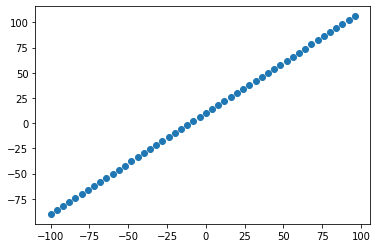

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* Training set: model learns from this data (70-80% of the toal data you have available)
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available
* Test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data avaialable 

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data

Now we have our data in training and test sets, lets visualize again!

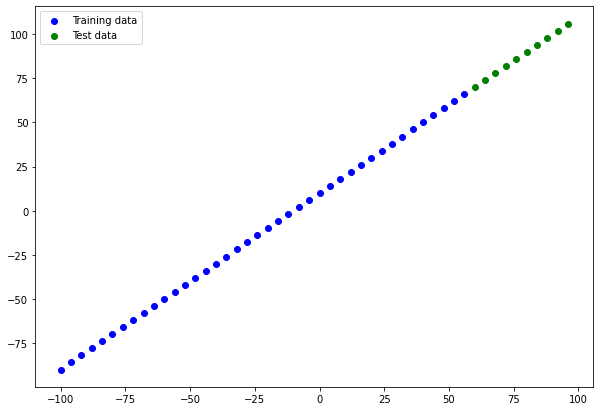

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='blue', label='Training data')

plt.scatter(X_test, y_test, c='green', label='Test data')

plt.legend()

In [ ]:
# Lets have a look at how to build a neural network for our data!

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#Fit the model


In [ ]:
# Visualizing the model

model.summary()

ValueError: ignored

In [ ]:
# Lets create a model which builds automatically by defining 
#the input_shape augument

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # passing just one number X[0]
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total_params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters arent updated during training (this is typical when you bring in already learn patterns or parameters from other odels during **transfer learning**
 
 
 
Note! **Dense** means fully connected: all neurons connect to all the others in the next layer

**Extra link** :  mit inrtroduction to deep learning

In [ ]:
# Exercise: play with the hidden units

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]) # passing just one number X[0]
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

model.evaluate(X_test, y_test, verbose=0)

model.predict([22.0])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 54ms/step


array([[19.903452, 19.891891, 19.836065, 19.847013, 19.875015, 19.908583,
        19.89177 , 19.911207, 19.882849, 19.830654]], dtype=float32)

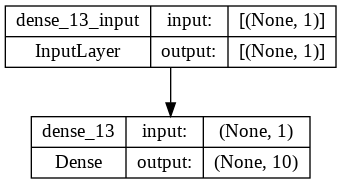

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

Model: "one_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


evaluation :  [3.1969382762908936, 3.1969382762908936]
1/1 [==============================] - 0s 66ms/step


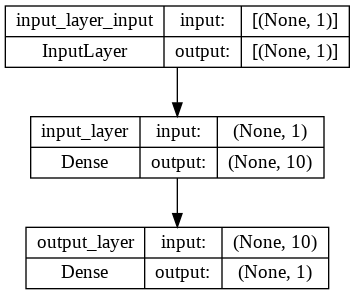

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'), # passing just one number X[0]
    tf.keras.layers.Dense(1, name='output_layer') 
], name="one_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

print('evaluation : ', model.evaluate(X_test, y_test, verbose=0))

model.predict([22.0])

plot_model(model=model, show_shapes=True)

### Visualizing our models' predictions

To visualize predictions, its a good idea to plot them against the ground truth.

Often you will seee this in the form of y_test or y_true vs y_pred (ground truth vs you rmodels predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function
# - if you feel like you are goingg to reuse it many times, make a function

def plot_predictions(train_data=X_train, train_labels=y_train, 
                     test_data=X_test, test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth 
  """
  plt.figure(figsize=(10,7))
  # PLotting data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot models predictions in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  # Show the legend
  plt.legend()

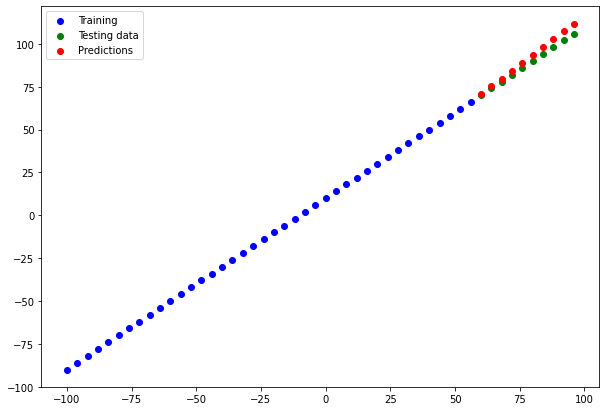

In [ ]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, 
                 test_labels=y_test, predictions=y_pred)

Model: "one_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
evaluation :  [0.19655990600585938, 0.19655990600585938]
1/1 [==============================] - 0s 45ms/step


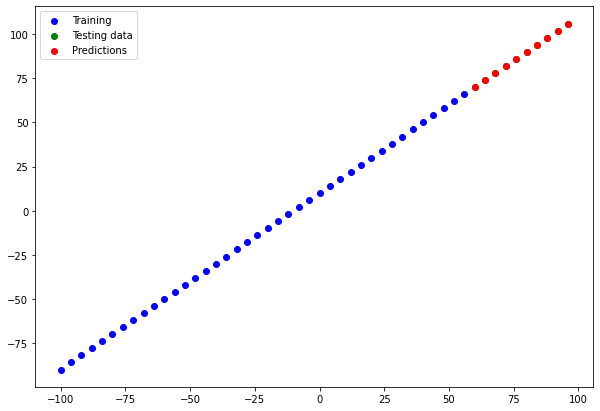

In [ ]:
# Exercise

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name='input_layer'), # passing just one number X[0]
    tf.keras.layers.Dense(1, name='output_layer') 
], name="one_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.055),
              metrics=["mae"])

model.summary()

model.fit(X_train, y_train, epochs=100, verbose=0)

print('evaluation : ', model.evaluate(X_test, y_test, verbose=0))

y_pred = model.predict(X_test)

plot_model(model=model, show_shapes=True)

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, 
                 test_labels=y_test, predictions=y_pred)

### Evaluating our models predictions with regression evaluation metrics

Depeding on the problem you are working on, there will be different evaluation metrics to evaluate your models performance

Since we are working on a regression, two of the main metrics:
* MAE: mean aboslute error, "on average, how wrong is each pf the models predictions". as the great starter metric for any regression problem.
`tf.keras.losses.mae`
`tf.keras.losses.MAE()`
`tf.metrics.mean_absolute_error()`

* MSE - mean square error, 'square the average errors', when larger errors are more significant than smaller errors.
`tf.keras.losses.mse`
`tf.keras.losses.MSE()`
`tf.metrics.mean_square_error()`

* Huber: combination of MSE and MAE, less sensitive to outliers than MSE
`tf.keras.losses.Huber()`

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)
# loss and metrics are mae, as chosen above

1/1 [==============================] - 0s 21ms/step - loss: 0.1966 - mae: 0.1966


[0.19655990600585938, 0.19655990600585938]

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae # gives metric for each of the prediction
# because y_preds has one dimension more than y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.139305, 14.921625, 12.49885 , 10.870987, 10.03804 , 10.      ,
       10.756871, 12.308652, 14.655347, 17.796947], dtype=float32)>

In [ ]:
tf.squeeze(tf.constant(y_pred))
# making y_preds the same shape as y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.860695,  73.84797 ,  77.83525 ,  81.82253 ,  85.8098  ,
        89.79707 ,  93.784355,  97.77163 , 101.75891 , 105.746185],
      dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae # gives metric for each of the prediction

<tf.Tensor: shape=(), dtype=float32, numpy=0.1965599>

In [ ]:
# Calculate the mean square error
# REMOVE THE SINGLE DIMENSION!!!
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.039971344>

In [ ]:
# Make some functions to reuse MAE ana MSE

def mae(y_true, y_pred):
  y_pred_squeezed = tf.squeeze(y_pred)
  return tf.metrics.mean_absolute_error(y_true=y_test, y_preds=y_pred_squeezed)

def mse(y_true, y_pred):
  return tf.metrics.mean_square_error(y_true=y_test, y_preds=y_pred)

### Running experiments to improve ouir model

tweak, fit, evaluate, tweak, fit, evaluate

visualize, visualize, visualize!

1. Get more data
2. MAke our model larger (more complex, more layers, more hidden units)
3. Train for longer

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

Lets do 3 modeling experiments

1. model_1 = 1 layer, 100 epochs
2. model_2 - 2 layers, 100 epochs
3. model_3 - 2 layers, 500 epochs

### Build model 1

In [ ]:
# Build model 1

tf.random.set_seed(42)

# Split the data into train and test sets
X_train = X[:40] # first 40 training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] #last 10 testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train),len(X_test), len(y_test)

# Create the model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step -

In [ ]:
# Evaluate the model
model1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 124ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

1/1 [==============================] - 0s 51ms/step


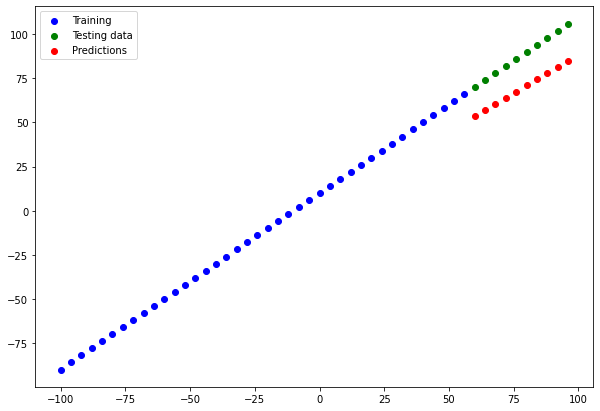

In [ ]:
# Make and plot predictions
y_preds1 = model1.predict(X_test)
plot_predictions(predictions=y_preds1)

In [ ]:
# Make some functions to reuse MAE ana MSE
# I add tf.squeeze to the function
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

In [ ]:
# Calculate metrics
mae_1 = mae(y_test, y_preds1)
mse_1 = mse(y_test, y_preds1) 

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Build Model 2!
* 2 dense layers trained for 100 epochs

In [ ]:
tf.random.set_seed(42)

# create
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# compile
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#fit
model2.fit(X_train , y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 27ms/step


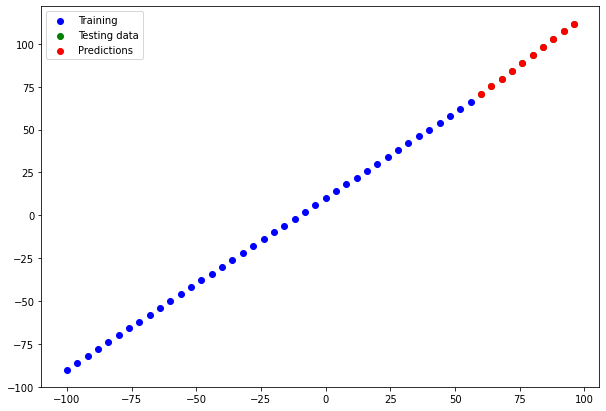

In [ ]:
# Make and plot predictions
ypreds2 = model2.predict(X_test)
plot_predictions(test_labels=ypreds2)

In [ ]:
# Calculate metrics
mae_2 = mae(y_test, ypreds2)
mse_2 = mse(y_test, ypreds2) 

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

### Build Model 3 - fast way hehehe

2 layers, 500 epochs

1/1 [==============================] - 0s 58ms/step
MAE is 68.71361541748047 and MSE is 4808.02734375


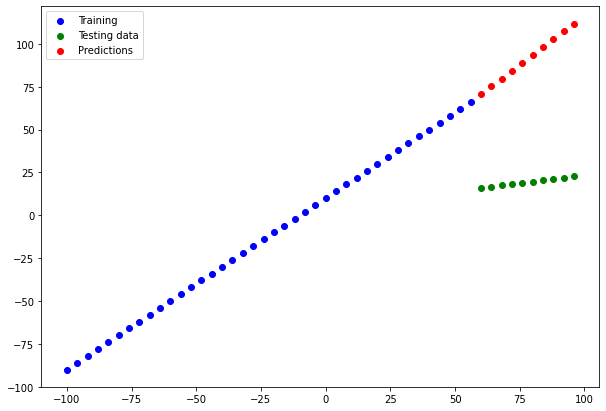

In [ ]:
tf.random.set_seed(42)

# create model 3
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# compile model 3
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#fit model 3
model3.fit(X_train , y_train, epochs=500, verbose=0)

# Make and plot predictions model 3
ypreds3 = model3.predict(X_test)
plot_predictions(test_labels=ypreds3)

# Calculate metrics model 3
mae_3 = mae(y_test, ypreds3)
mse_3 = mse(y_test, ypreds3) 

print(f'MAE is {mae_3} and MSE is {mse_3}')

## Comparing the results of our experiments

In [ ]:
# Lets use a pandas df 

import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

# looks like model 2 behaves better

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


**Note** : one of our main goals shoudl be minimize the time between your experiments. The more experiments you do, the more things we will figure it out which dont work and in turn, get closer to figuring out what does works. remember the machine learning practiocinner motto: experiment, exp, exp!!

In [ ]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments

it can be tedious

Luckily, there are tools to heeeeeelp

* TensorBoard - a component of the TensorFlow libraary to help tracking modellling experiments
* Weights & Biases - a tool for tracking any kind of ML experiment, plugs directly inside TensorBoard

## Saving the model

Saving our model allows us to use them outside of Google Colab, like in a web app ou site

1. The SaveModel format
2. The HDF5 format

In [ ]:
# Save model using the SaveModel format
# get a folder
model2.save('bestmodel_SaveModel_format')

In [ ]:
# Save the model using the HDF5 format
# get a file only
model2.save('bestmodel_HDF5_format.h5')

## Loading in a saved model

In [ ]:
# Load the SaveModel format
loaded_SvaedModel_format = tf.keras.models.load_model("bestmodel_SaveModel_format/") 
loaded_SvaedModel_format.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# How to check the weights? Instead of just the summary
model_2_preds = model2.predict(X_test)
loaded_SvaedModel_preds = loaded_SvaedModel_format.predict(X_test)

model_2_preds == loaded_SvaedModel_preds

1/1 [==============================] - 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Lets load HDF5
loaded_H5 = tf.keras.models.load_model('bestmodel_HDF5_format.h5')
loaded_H5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.predict(X_test) == loaded_H5.predict(X_test)

1/1 [==============================] - 0s 266ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a Model or any file from Google Colab

If you want to download your files from Google Colab:

1. Download butool
2. Use code, below! 

In [ ]:
# Download files
from google.colab import files
files.download("/content/bestmodel_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save file from colba to drive
!cp /content/bestmodel_HDF5_format.h5 /content/drive/MyDrive/tesnorflow_course

## A larger example

In [ ]:
X_train, y_train # simple dataset

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
# Import the libraries
import tesnorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
# Read the file dataset insurance
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# one hot encoding using pandas
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
pd.crosstab(insurance_one_hot.sex_male, insurance_one_hot.charges)

charges,1121.87390,1131.50660,1135.94070,1136.39940,1137.01100,1137.46970,1141.44510,1146.79660,1149.39590,1163.46270,...,48885.13561,48970.24760,49577.66240,51194.55914,52590.82939,55135.40209,58571.07448,60021.39897,62592.87309,63770.42801
sex_male,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,1
1,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,1,0


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot.charges

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)
len(X), len(X_train), len(X_test)


(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8536.8818 - mae: 8536.8818
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7817.2993 - mae: 7817.2993
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7591.8706 - mae: 7591.8706
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7668.2153 - mae: 7668.2153
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7673.0830 - mae: 7673.0830
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 7606.2773 - mae: 7606.2773
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7529.7305 - mae: 7529.7305
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.9663 - mae: 7748.9663
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7479.0654 - mae: 7479.0654
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7737.9722 - mae: 7737.9722

In [ ]:
# Check the results of the insurance model

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
y_train.median()

9575.4421

In [ ]:
y_train.mean() # the model is super off! not good

13346.089736364485

Right now the model is not performing so well, lets try to improve it

Two things we can try:
1. Extra layers
2. Train for longer

In [ ]:
# Set ramdom seed
tf.random.set_seed(42)

# create
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#fit
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the models

print('model 1 : ', insurance_model.evaluate(X_test, y_test))

print('model 2 : ', insurance_model_2.evaluate(X_test, y_test))

9/9 [==============================] - 0s 4ms/step - loss: 8742.9355 - mae: 8742.9355
model 1 :  [8742.935546875, 8742.935546875]
9/9 [==============================] - 0s 6ms/step - loss: 4924.4956 - mae: 4924.4956
model 2 :  [4924.49560546875, 4924.49560546875]


In [ ]:
# Model 3

tf.random.set_seed(42)

# create
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# fit
history = insurance_model_3.fit(X_train, y_train, epochs=200)
history

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the models

print('model 1 : ', insurance_model.evaluate(X_test, y_test))

print('model 2 : ', insurance_model_2.evaluate(X_test, y_test))

print('model 3 : ', insurance_model_3.evaluate(X_test, y_test))

9/9 [==============================] - 0s 2ms/step - loss: 8742.9355 - mae: 8742.9355
model 1 :  [8742.935546875, 8742.935546875]
9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956
model 2 :  [4924.49560546875, 4924.49560546875]
9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856
model 3 :  [3488.785400390625, 3488.78564453125]


Text(0.5, 0, 'epochs')

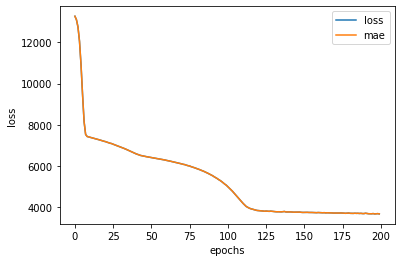

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# history is inside the fit() function!

**Question** how long should we train for?
depends!! on the problem.. TF has a solution: EarlyStopping CallBack!

## Preprocessing data (normalization and standardization) :D

- Neural networks tends to prefers normalization

In [ ]:
insurance_one_hot.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

bmi
charges
age
children


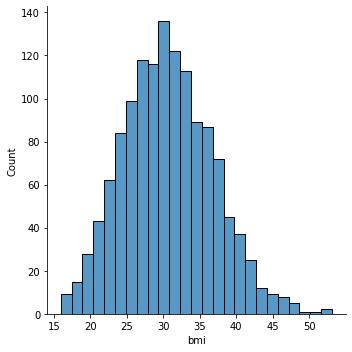

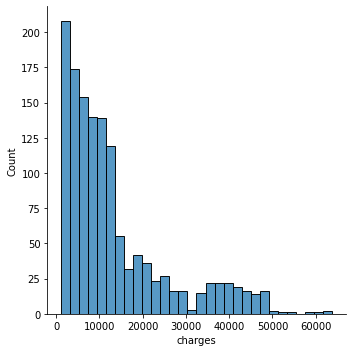

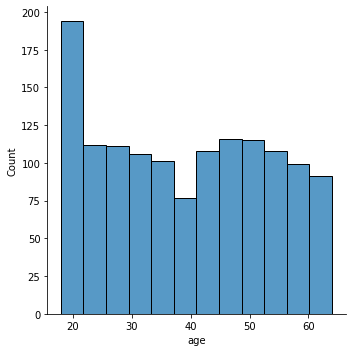

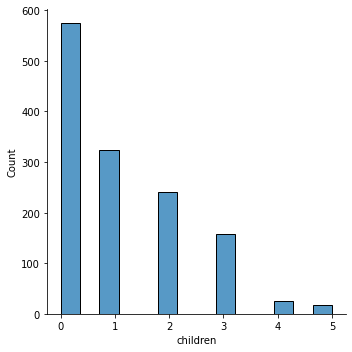

In [ ]:
import seaborn as sns

# Plotting everything in function of their counts (distribution)
for col in insurance_one_hot.select_dtypes('float'):
    print(col)
    sns.displot(insurance_one_hot[col])
    
for col in insurance_one_hot.select_dtypes('int'):
    print(col)
    sns.displot(insurance_one_hot[col])

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


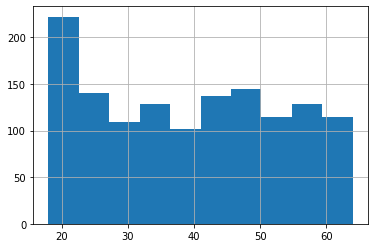

In [ ]:
X.age.hist()

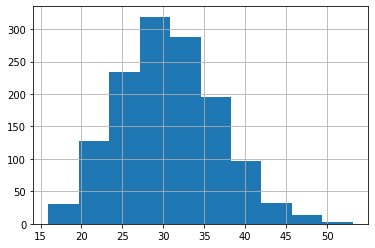

In [ ]:
X.bmi.hist()

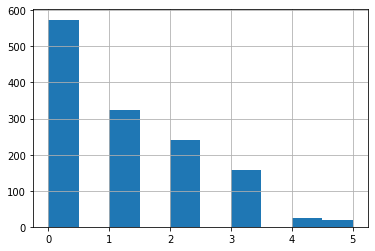

In [ ]:
X.children.hist()

1. Scaling or Normalization: MinMaxScaler (convert all values to between 0 and 1)

2. Stardardization : StandardScaler (removes the mean and divides by the standard deviation)

In [ ]:
import pandas as pd
import matplotlib.pyplt as plt
import tensorflow as tf

ModuleNotFoundError: ignored

In [ ]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from SKlearn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown='ignore'), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance.charges

# build train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transofrm training and test data with normalization (MinMaxScaler) and OneHot
X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [ ]:
# How the data looks like now?
X_train.loc[0], X_train_norm[0]
# everything is numeric now

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
X_train.shape, X_train_norm.shape
# more columns because we onehotencoded

((1070, 6), (1070, 11))

Data has been normalized and onehotencoded

In [ ]:
# Build a new model with this preprocessed data
# we replicate model2, we add the new norm data
model_preproc = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile
model_preproc.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["mae"])

# fit
model_preproc.fit(X_train_norm, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13343.5977 - mae: 13343.5977
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13332.3828 - mae: 13332.3828
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13304.9385 - mae: 13304.9385
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13249.0479 - mae: 13249.0479
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13153.1133 - mae: 13153.1133
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13006.1445 - mae: 13006.1445
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12798.3076 - mae: 12798.3076
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12519.9453 - mae: 12519.9453
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12161.4766 - mae: 12161.4766
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11725.47

In [ ]:
# Evaluate our insurance model preproc
print('model preproc: ', model_preproc.evaluate(X_test_norm, y_test))

# we went from almost 5000 to 3166!!!

9/9 [==============================] - 0s 4ms/step - loss: 3166.0994 - mae: 3166.0994
model preproc:  [3166.099365234375, 3166.099365234375]
